In [11]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astrocut import fits_cut
import dLux.utils as dlu

cmap = plt.get_cmap('inferno')
cmap.set_bad('k')

import warnings; warnings.simplefilter('ignore')


You will have used `bash ../data/MAST_2024-07-03T0023` to download the datasets - this should create a directory `..data/MAST_2024-07-03T0023/HST/` with many subdirectories, each of which contains a dataset. Let's explore one of these.

In [12]:
ddir = '../data/MAST_2024-07-03T0023-1/'
fname = ddir + 'HST/n8yj27020/n8yj27020_mos.fits'
#fname = ddir + 'HST/n8yj65010/n8yj65010_mos.fits'
fname = ddir + 'HST/n9nk01010/n9nk01010_mos.fits'

# n8yj: 2 3 ~6 ~27 38 ~40 ~49 ~~56 65
# n9nk: 1 ~~4 ~5 14 ~~15

# 16 is good binary

prog = 'n8yj'#'n9nk'#'n8yj'

num = 65#65

wv = '2'

fname = ddir + f'HST/{prog}{num:02}0{wv}0/{prog}{num:02}0{wv}0_mos.fits'

ddir = '../data/MAST_2024-07-07T03_17_36.223Z/'
fname = ddir + 'HST/n8ku01050_mos.fits'

#ddir = '../data/MAST_2024-07-11T09_26_05.575Z/'
#fname = ddir + 'HST/N43C02020/n43c02020_mos.fits'

ddir = '../data/MAST_2024-07-11T09_26_05.575Z/'
fname = ddir + 'HST/N43C03020/n43c03020_mos.fits'
fname = ddir + 'HST/N43CA5010/n43ca5010_mos.fits'

ddir = '../data/MAST_2024-07-07T03_17_36.223Z/'
fname = ddir + 'HST/n8ku01050_mos.fits'

ddir = "../data/MAST_2025-03-06T11_16_44.723Z/HST/"
fname = ddir + 'n6nd12goq_cal.fits'
fname = ddir + 'n6nd12h0q_cal.fits'

ddir = '../data/MAST_2025-03-06T11_35_52.340Z/HST/'

fname = ddir + 'n4be02npq_cal.fits'

fname = '../data/MAST_2025-08-10T10_47_54.285Z/HST/na2i03dbq_cal.fits'

data = fits.getdata(fname, ext=1)
data.shape
print(np.max(data))

err = fits.getdata(fname, ext=2)
print(np.max(err))

info = fits.getdata(fname, ext=3)

bad = np.asarray((err==0.0) | (info&256) | (info&64) | (info&32))

3565.5327
100000.0


In [13]:
data.flatten()

array([0.34222472, 0.5004062 , 0.5066477 , ..., 0.47962517, 0.7963952 ,
       0.11956187], dtype='>f4')

(array([2.500e+01, 2.280e+02, 8.610e+02, 2.205e+03, 3.779e+03, 4.914e+03,
        5.046e+03, 5.054e+03, 5.528e+03, 6.491e+03, 6.826e+03, 6.171e+03,
        4.699e+03, 3.173e+03, 2.203e+03, 1.579e+03, 1.105e+03, 8.110e+02,
        7.010e+02, 5.810e+02, 5.060e+02, 4.320e+02, 3.540e+02, 2.770e+02,
        2.390e+02, 1.920e+02, 1.910e+02, 1.490e+02, 1.300e+02, 1.200e+02,
        1.250e+02, 1.170e+02, 9.900e+01, 7.100e+01, 6.100e+01, 2.900e+01,
        2.300e+01, 2.900e+01, 2.700e+01, 1.700e+01, 2.200e+01, 1.400e+01,
        6.000e+00, 2.000e+00, 3.000e+00, 3.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 5.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 5.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 4.000e+00, 2.000e+00, 6.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+0

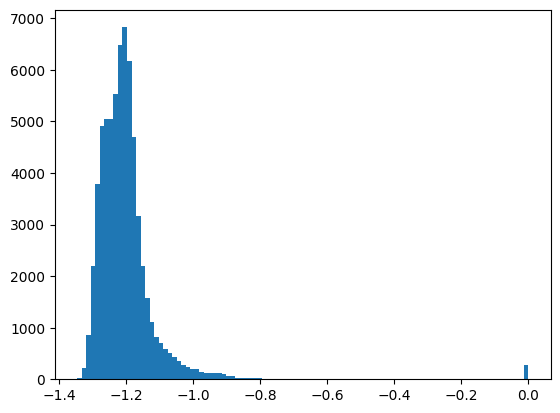

In [14]:
err = np.where(bad, 1, np.asarray(err, dtype=float))
data = np.where(bad, 1, np.asarray(data, dtype=float))
plt.hist(np.log10(err.flatten()), bins=100)

In [15]:
#plt.hist(np.log10((data/err).flatten()), bins=100)

(array([271.,  36.,  13.,  14.,   9.,   3.,   7.,   4.,   9.,   5.,   6.,
          5.,   5.,   2.,   1.,   3.,   0.,   0.,   0.,   2.,   0.,   0.,
          1.,   0.,   2.,   1.,   1.,   0.,   1.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  10.0287714 ,   45.58381083,   81.13885027,  116.6938897 ,
         152.24892914,  187.80396857,  223.35900801,  258.91404744,
         294.46908688,  330.02412631,  365.57916574,  401.13420518,
         436.68924461,  472.24428405,  507.79932348,  543.35436292,
         578.90940235,  614.46444179,  650.019

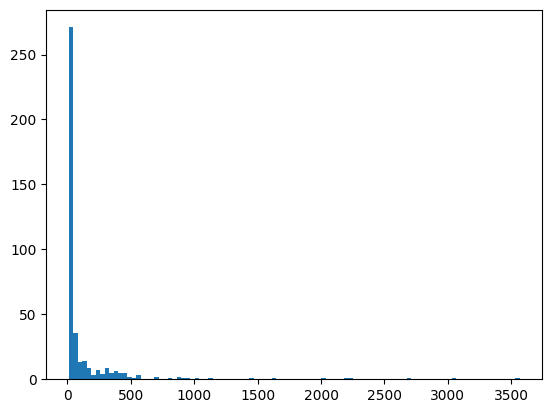

In [16]:
plt.hist(data.flatten()[data.flatten()>10], bins=100)

In [17]:
hdul =fits.open(fname)
hdul.info()
hdul.close()

Filename: ../data/MAST_2025-08-10T10_47_54.285Z/HST/na2i03dbq_cal.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     308   ()      
  1  SCI           1 ImageHDU       143   (256, 256)   float32   
  2  ERR           1 ImageHDU        71   (256, 256)   float32   
  3  DQ            1 ImageHDU        71   (256, 256)   int16   
  4  SAMP          1 ImageHDU        71   (256, 256)   int16   
  5  TIME          1 ImageHDU        71   (256, 256)   float32   


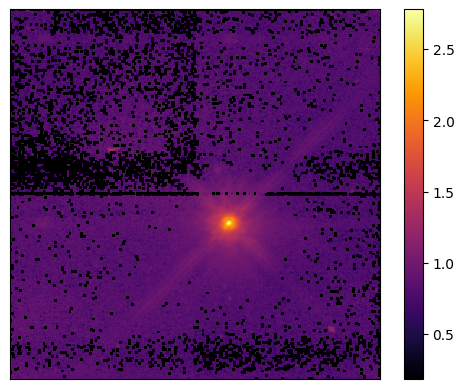

In [18]:
plt.imshow(data**0.125,cmap=cmap,origin='lower')
plt.xticks([])
plt.yticks([])
plt.colorbar()


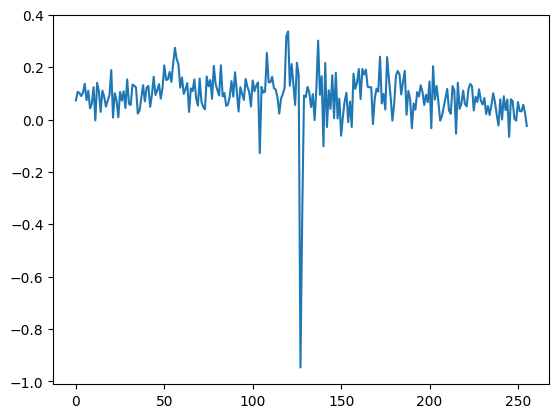

In [19]:
plt.plot(np.log10(1+data[:,100]))

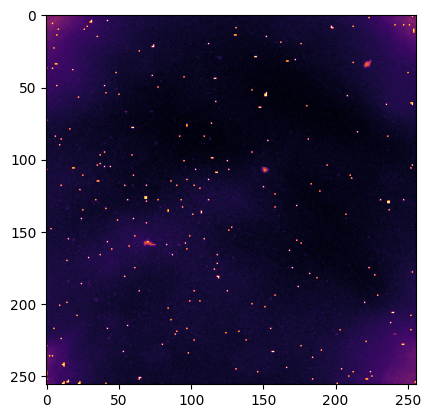

In [20]:
plt.imshow(err**0.125,cmap=cmap)

In [21]:
hdr = fits.getheader(fname, ext=0) # this is the overall header - with lots of metadata
print(hdr)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                   16 / Bits per pixel                                 NAXIS   =                    0 / Number of axes                                 EXTEND  =                    T / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        IRAF-TLM= '07:47:59 (30/10/2009)' / Time of last modification                   NEXTEND =                    5 / Number of standard extensions                  DATE    = '2009-10-30T07:47:59' / date this file was written (yyyy-mm-dd)       FILENAME= 'na2i03dbq_cal.fits' / name of file                                   FILETYPE= 'SCI      '          / type of data found in data file                                                                                                TELESCOP= 'HST'                / telescope used to acquire data                 INSTRUME= 'NICMOS'             / identif

In [22]:
metadata = { # this is the main subset of metadata we care about from the header 
    'tel'    : hdr['TELESCOP'],         # telescope - should be HST
    'fname'  : hdr['FILENAME'],         # original file name
    'ap'     : hdr['APERTURE'],
    'odate'  : hdr['DATE-OBS'],         # UTC date of observation
    'otime'  : hdr['TIME-OBS'],         # UTC time of observation
    'tint'   : hdr['EXPTIME' ],         # integration time (sec)
    'filter' : hdr['FILTER'],           # filter name - should be F110W, or F170W
    'RA'     : hdr['RA_TARG' ],         # right ascension (deg)
    'DEC'    : hdr['DEC_TARG'],         # declination (deg)
    'wavel' : hdr['PHOTPLAM']*1e-10, # central wavelength (meters)
    'orient' : hdr['ORIENTAT'] # P.A. of image y axis (deg e. of n.)
    }

print(metadata)

{'tel': 'HST', 'fname': 'na2i03dbq_cal.fits', 'ap': 'NIC1', 'odate': '2007-07-28', 'otime': '05:59:02', 'tint': 39.95282, 'filter': 'POL0S', 'RA': 350.602966481, 'DEC': -2.228221344953, 'wavel': 1.0564600000000001e-06, 'orient': 5.48477}


In [23]:
image_hdr = fits.getheader(fname, ext=1) # this is the header for just the image in particular

# rather than manipulate WCS coordinates ourselves, can use https://docs.astropy.org/en/stable/wcs/
w = WCS(image_hdr)

In [24]:
w.wcs.print_contents()

       flag: 137
      naxis: 2
      crpix: 0x13d69b9f0
               162.00       100.00    
         pc: 0x13d69c2c0
    pc[0][]:  -1.1958e-05   1.1463e-06
    pc[1][]:   1.1482e-06   1.1938e-05
      cdelt: 0x13d69c2e0
               1.0000       1.0000    
      crval: 0x13d69ba00
               350.60      -2.2282    
      cunit: 0x13d6985a0
             "deg"
             "deg"
      ctype: 0x13d69ca70
             "RA---TAN"
             "DEC--TAN"
    lonpole: 180.000000
    latpole: -2.228217
    restfrq: 0.000000
    restwav: 0.000000
        npv: 0
     npvmax: 0
         pv: 0x0
        nps: 0
     npsmax: 0
         ps: 0x0
         cd: 0x13d698630
    cd[0][]:  -1.1958e-05   1.1463e-06
    cd[1][]:   1.1482e-06   1.1938e-05
      crota: 0x13d698650
               0.0000       0.0000    
     altlin: 2
     velref: 0
        alt: ' '
     colnum: 0
      colax: 0x13d69c5b0
                 0      0
      cname: 0x13d69cb00
             UNDEFINED
             UNDEFINED
 

In [25]:
w.proj_plane_pixel_scales()
dlu.deg2arcsec(1.19930916e-05)

0.04317512976

In [26]:
print(w.pixel_to_world_values(128,128))

(array(350.60338751), array(-2.22790872))


Let's crop this to something more manageable in size.

151 107
(30, 30)


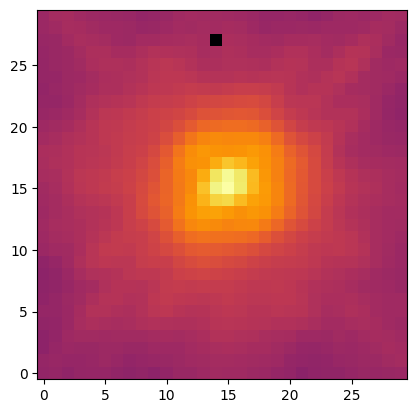

In [27]:
# get brightest pixel coordinates
y,x = np.unravel_index(np.argmax(data),data.shape)
centre = SkyCoord(w.pixel_to_world(x,y), unit='deg') # astropy wants to keep track of units

print(x,y)

# use fits_cut because we want WCS metadata cropped appropriately
cutout = fits_cut(fname, centre, 30, single_outfile=False, memory_only=True)[0] 
cropped = cutout[1].data
cropped_image_hdr = cutout[1].header

print(cropped.shape)
plt.imshow(cropped**0.125,cmap=cmap,origin='lower');

In [28]:
cutout.info()

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      11   ()      
  1  CUTOUT        1 ImageHDU       141   (30, 30)   float32   


In [29]:
import glob

In [30]:
file = glob.glob("../data/MAST_2024-09-22T03_37_01.724Z/HST/*_asc.fits")[0]

hdul =fits.open(file)
hdul.info()
hdul.close()

Filename: ../data/MAST_2024-09-22T03_37_01.724Z/HST/n8yj23020_asc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  ASC           1 BinTableHDU     47   3R x 7C   [14A, 14A, 1L, 1L, 1E, 1E, 1E]   


In [31]:
[x[0]+"_cal.fits" for x in fits.getdata(file, ext=1)[0:2]]

['n8yj23jqq_cal.fits', 'n8yj23jsq_cal.fits']